<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : P48 - Introduction of Unsupervised Learning

#### Name: 

#### IC Number:

#### Date :

#### Introduction : 



#### Conclusion :






This is an excerpt from the Hands-on Machine Learning with Scikit-Learning by Aurélien Géron.

# Unsupervised Learning Techniques

Although most of the applications of Machine Learning today are based on supervised learning (and as a result, this is where most of the investments go to), the vast majority of the available data is unlabeled: we have the input features X, but we do not have the labels y. The computer scientist Yann LeCun famously said that “if intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake.” In other words, there is a huge potential in unsupervised learning that we have only barely started to sink our teeth into.

Say you want to create a system that will take a few pictures of each item on a manufacturing production line and detect which items are defective. You can fairly easily create a system that will take pictures automatically, and this might give you thousands of pictures every day. You can then build a reasonably large dataset in just a few weeks. But wait, there are no labels! If you want to train a regular binary classifier that will predict whether an item is defective or not, you will need to label every single picture as “defective” or “normal.” This will generally require human experts to sit down and manually go through all the pictures. This is a long, costly, and tedious task, so it will usually only be done on a small subset of the available pictures. As a result, the labeled dataset will be quite small, and the classifier’s performance will be disappointing. Moreover, every time the company makes any change to its products, the whole process will need to be started over from scratch. Wouldn’t it be great if the algorithm could just exploit the unlabeled data without needing humans to label every picture? Enter unsupervised learning.

## A few unsupervised learning tasks and algorithms

### Clustering
The goal is to group similar instances together into clusters. Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.

### Anomaly detection
The objective is to learn what “normal” data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in a time series.

### Density estimation
This is the task of estimating the probability density function (PDF) of the random process that generated the dataset. Density estimation is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. It is also useful for data analysis and visualization.

## Clustering

As you enjoy a hike in the mountains, you stumble upon a plant you have never seen before. You look around and you notice a few more. They are not identical, yet they are sufficiently similar for you to know that they most likely belong to the same species (or at least the same genus). You may need a botanist to tell you what species that is, but you certainly don’t need an expert to identify groups of similar-looking objects. This is called **clustering**: **_it is the task of identifying similar instances and assigning them to clusters, or groups of similar instances_**.

Just like in classification, each instance gets assigned to a group. However, unlike classification, clustering is an unsupervised task. Consider Figure 9-1: on the left is the iris dataset (introduced in Chapter 4), where each instance’s species (i.e., its class) is represented with a different marker. It is a labeled dataset, for which classification algorithms such as Logistic Regression, SVMs, or Random Forest classifiers are well suited. On the right is the same dataset, but without the labels, so you cannot use a classification algorithm anymore. This is where clustering algorithms step in: many of them can easily detect the lower-left cluster. It is also quite easy to see with our own eyes, but it is not so obvious that the upper-right cluster is composed of two distinct sub-clusters. That said, the dataset has two additional features (sepal length and width), not represented here, and clustering algorithms can make good use of all features, so in fact they identify the three clusters fairly well (e.g., using a Gaussian mixture model, only 5 instances out of 150 are assigned to the wrong cluster).

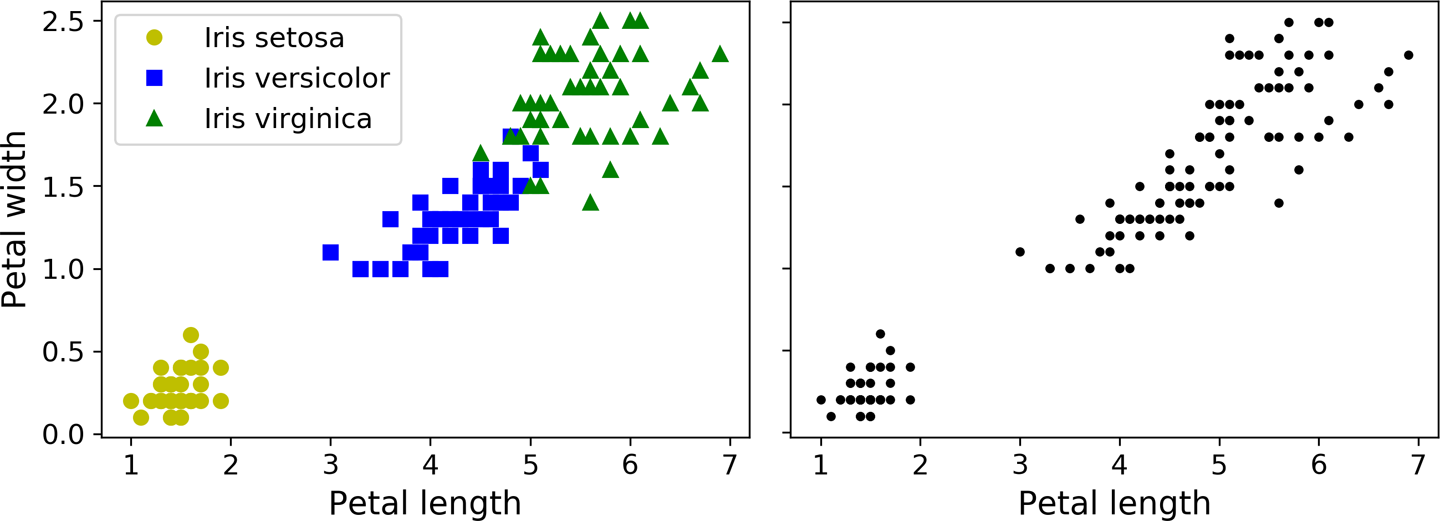

Clustering is used in a wide variety of applications, including these:

#### For customer segmentation
You can cluster your customers based on their purchases and their activity on your website. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, customer segmentation can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.

####  For data analysis
When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately.

#### As a dimensionality reduction technique
Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster (affinity is any measure of how well an instance fits into a cluster). Each instance’s feature vector x can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k-dimensional. This vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing.

#### For anomaly detection (also called outlier detection)
Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.

####  For semi-supervised learning
If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance.

#### For search engines
Some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is use the trained clustering model to find this image’s cluster, and you can then simply return all the images from this cluster.

#### To segment an image
By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in the image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

There is no universal definition of what a cluster is: it really depends on the context, and different algorithms will capture different kinds of clusters. Some algorithms look for instances centered around a particular point, called a centroid. Others look for continuous regions of densely packed instances: these clusters can take on any shape. Some algorithms are hierarchical, looking for clusters of clusters. And the list goes on.

In this section, we will look at two popular clustering algorithms, K-Means and DBSCAN, and explore some of their applications, such as nonlinear dimensionality reduction, semi-supervised learning, and anomaly detection.